# Part II - (Ford GoBike System Data)
## by (Hatem Hassan ElDaly)

## Investigation Overview


> In this investigation, I wanted to identify the common characteristics of users to identify common patterns among users and how to convert more users into subscribers.



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during Feburary 2019

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df = df.dropna()
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')
str_columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id']
for x in str_columns:
    df[x] = df[x].astype(str)
df['start_hour_of_the_day'] = df.start_time.dt.strftime('%H')
df['start_day_of_the_week'] = df.start_time.dt.strftime('%A')
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['member_age'] = 2022 - df.member_birth_year
df.member_birth_year = df.member_birth_year.astype('int')
df.member_age = df.member_age.astype('int')
df['duration_min'] = df.duration_sec / 60
df = df[(np.abs(stats.zscore(df.member_age)) < 3)]

duration_min_adj = df.duration_min[df.duration_min.between(df.duration_min.quantile(0.01), df.duration_min.quantile(0.99))]

hours = ['00', '01', '02', '03' '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


## Start trip time Vs User type

> For subsribers there's two surges in start trip time, first one at 8 in the morning and second one is at 5 in the evening, but with customers there's small difference between those 2 times


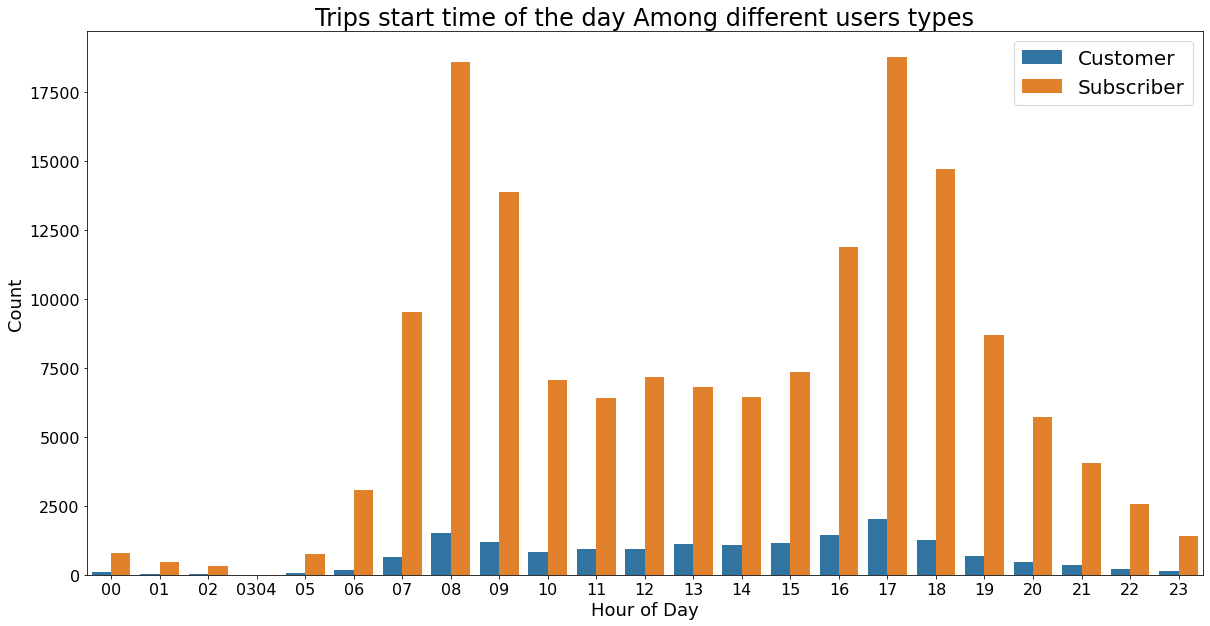

In [4]:
plt.figure(figsize= [20, 10])
sns.countplot(data = df, x='start_hour_of_the_day', hue='user_type', order = hours)
plt.title('Trips start time of the day Among different users types', fontsize=24)
plt.xlabel('Hour of Day', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 20);

## Gender Vs Users type

> The majority of trip were made by male users, but the ratio between customer to subscriber in female users are higher


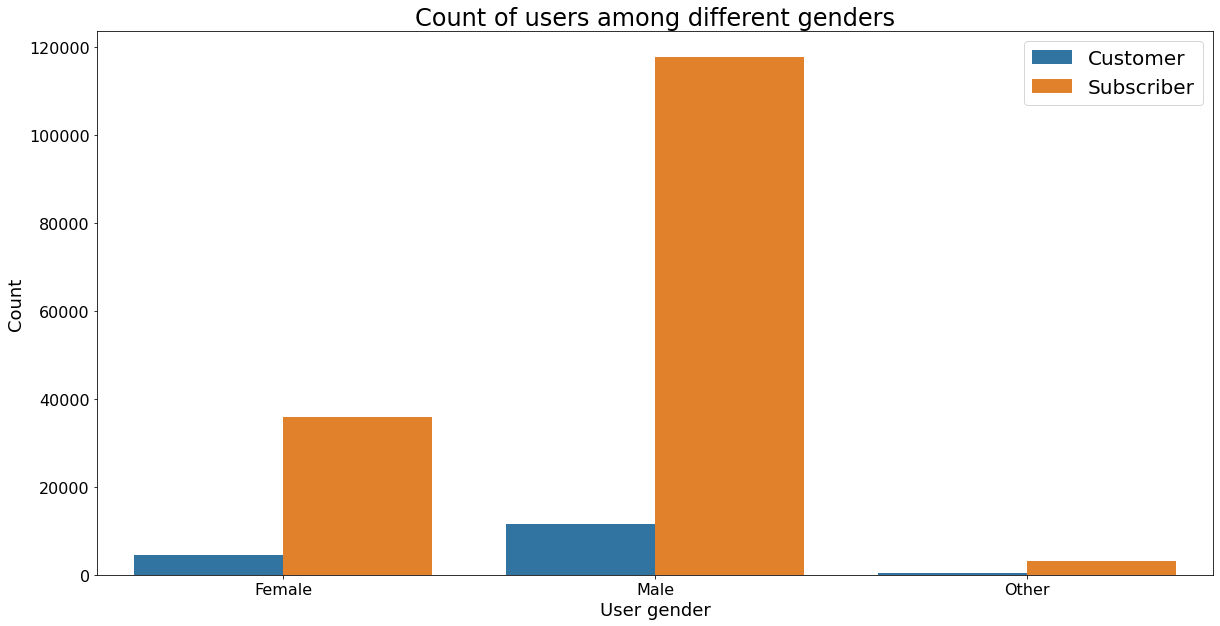

In [5]:
plt.figure(figsize= [20, 10])
sns.countplot(data = df, hue = 'user_type', x = 'member_gender')
plt.title('Count of users among different genders', fontsize=24)
plt.xlabel('User gender', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 20);

## Average ride duration Vs User types

> The majority of trip were made by male users, but the ratio between customer to subscriber in female users are higher

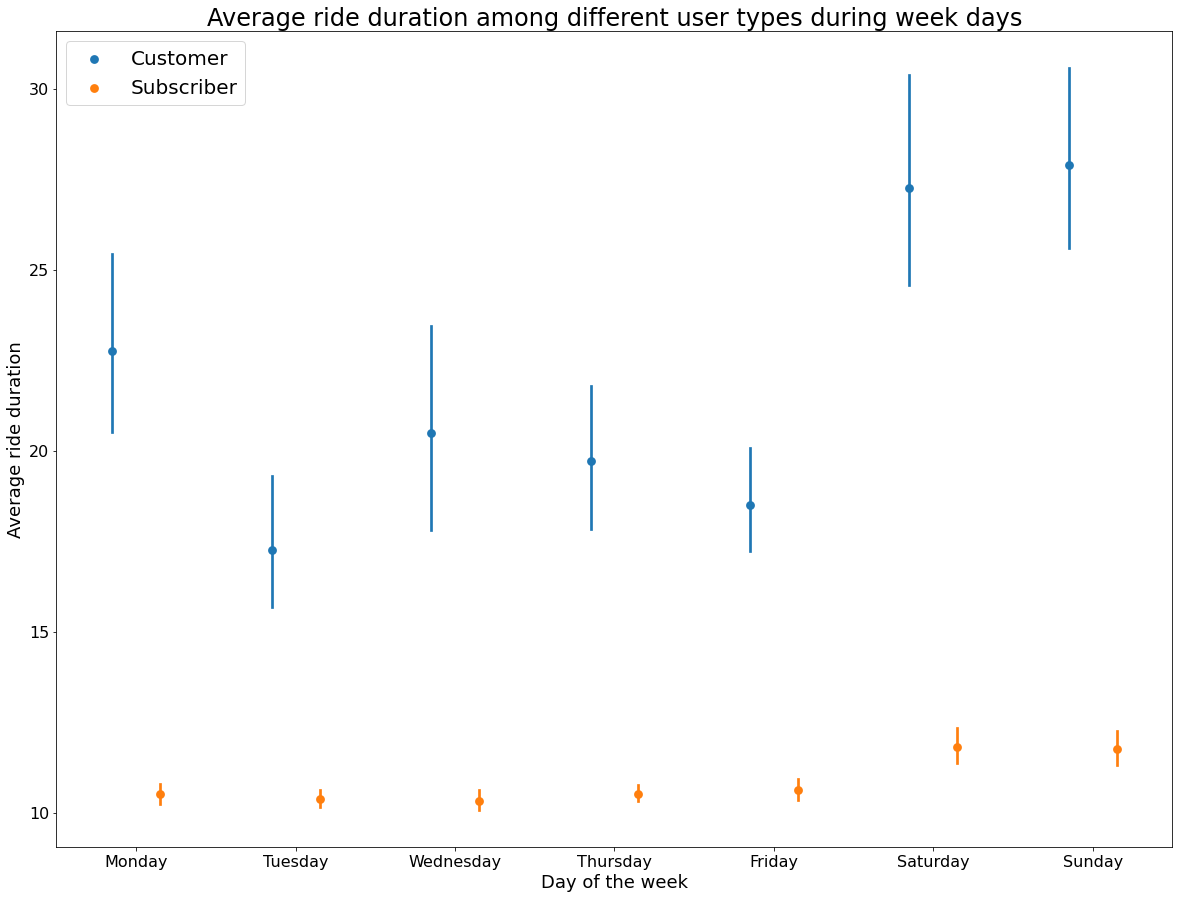

In [6]:
plt.figure(figsize= [20, 15])
sns.pointplot(data = df, x='start_day_of_the_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="", order = weekday)
plt.title('Average ride duration among different user types during week days', fontsize=24)
plt.xlabel('Day of the week', fontsize = 18)
plt.ylabel('Average ride duration', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 20);

## User age Vs Gender Vs User type

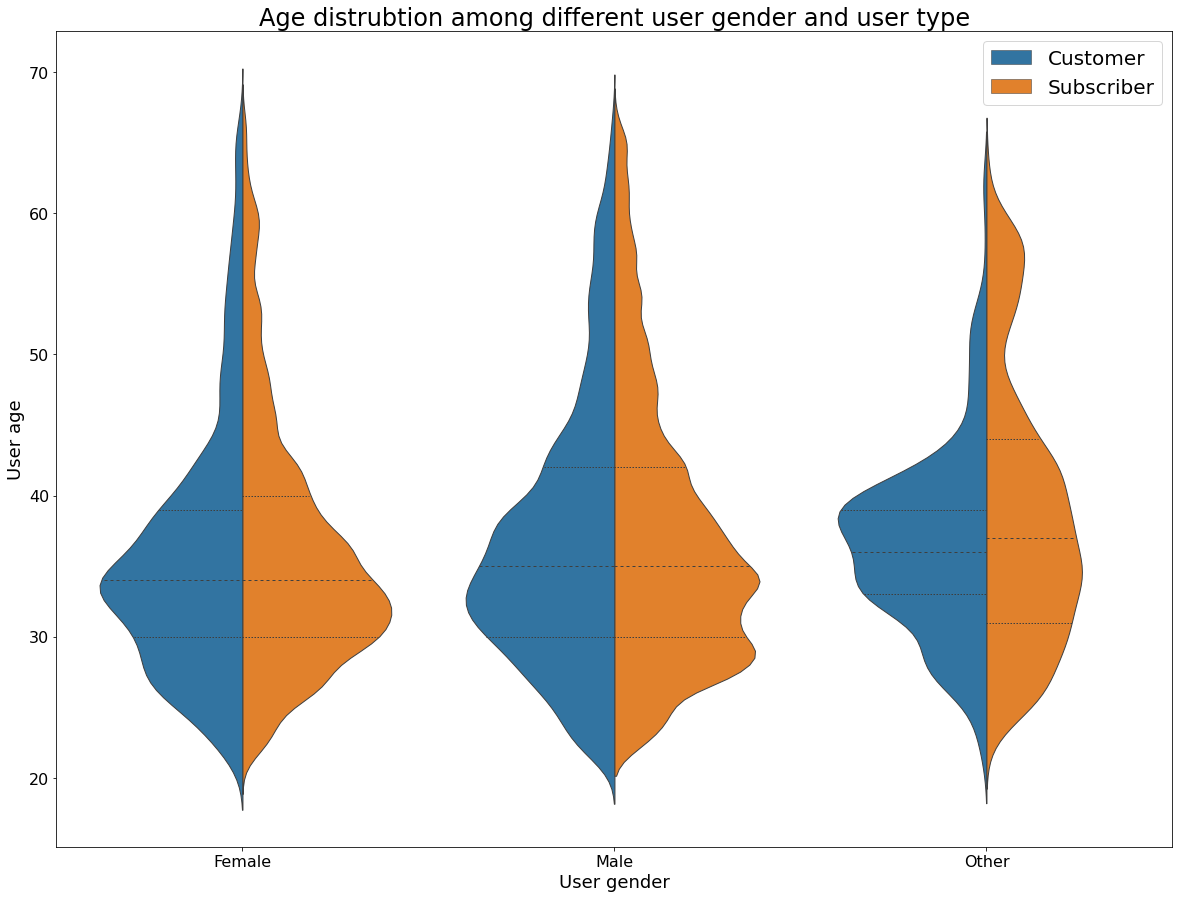

In [7]:
plt.figure(figsize= [20, 15])
sns.violinplot(data=df, x="member_gender", y="member_age", hue="user_type", split=True, inner="quart", linewidth=1)
plt.title('Age distrubtion among different user gender and user type', fontsize=24)
plt.xlabel('User gender', fontsize = 18)
plt.ylabel('User age', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 20);

In [11]:
# Use this command if you are running this file in local
!jupyter nbconvert ford_gobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook ford_gobike_slide_deck.ipynb to slides
[NbConvertApp] Writing 814638 bytes to ford_gobike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\aswan\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\aswan\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\aswan\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\aswan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\aswan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
